In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
r = requests.post('http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101G/BefUtvKon1749')
r

<Response [404]>

In [3]:
query_data = {
  "query": [
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1+2"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "0000001H"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [4]:
r = requests.post('http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101G/BefUtvKon1749',
                 json=query_data)
r

<Response [200]>

In [5]:
json_data = r.json()['data']
json_data

[{'key': ['1+2', '1749'], 'values': ['59483']},
 {'key': ['1+2', '1750'], 'values': ['64511']},
 {'key': ['1+2', '1751'], 'values': ['69291']},
 {'key': ['1+2', '1752'], 'values': ['64973']},
 {'key': ['1+2', '1753'], 'values': ['66007']},
 {'key': ['1+2', '1754'], 'values': ['68759']},
 {'key': ['1+2', '1755'], 'values': ['70008']},
 {'key': ['1+2', '1756'], 'values': ['67987']},
 {'key': ['1+2', '1757'], 'values': ['61675']},
 {'key': ['1+2', '1758'], 'values': ['63262']},
 {'key': ['1+2', '1759'], 'values': ['63865']},
 {'key': ['1+2', '1760'], 'values': ['68384']},
 {'key': ['1+2', '1761'], 'values': ['67324']},
 {'key': ['1+2', '1762'], 'values': ['68268']},
 {'key': ['1+2', '1763'], 'values': ['68231']},
 {'key': ['1+2', '1764'], 'values': ['67988']},
 {'key': ['1+2', '1765'], 'values': ['65872']},
 {'key': ['1+2', '1766'], 'values': ['67061']},
 {'key': ['1+2', '1767'], 'values': ['70744']},
 {'key': ['1+2', '1768'], 'values': ['67719']},
 {'key': ['1+2', '1769'], 'values': ['66

In [6]:
print ('record layout :',json_data[0])


record layout : {'key': ['1+2', '1749'], 'values': ['59483']}


In [7]:
born_df = pd.DataFrame.from_dict(json_data)
born_df

,key,values
0,"[1+2, 1749]",[59483]
1,"[1+2, 1750]",[64511]
2,"[1+2, 1751]",[69291]
3,"[1+2, 1752]",[64973]
4,"[1+2, 1753]",[66007]
...,...,...
267,"[1+2, 2016]",[117425]
268,"[1+2, 2017]",[115416]
269,"[1+2, 2018]",[115832]
270,"[1+2, 2019]",[114523]


In [8]:
born_df[['code','year']] = born_df['key'].to_list()
born_df

,key,values,code,year
0,"[1+2, 1749]",[59483],1+2,1749
1,"[1+2, 1750]",[64511],1+2,1750
2,"[1+2, 1751]",[69291],1+2,1751
3,"[1+2, 1752]",[64973],1+2,1752
4,"[1+2, 1753]",[66007],1+2,1753
...,...,...,...,...
267,"[1+2, 2016]",[117425],1+2,2016
268,"[1+2, 2017]",[115416],1+2,2017
269,"[1+2, 2018]",[115832],1+2,2018
270,"[1+2, 2019]",[114523],1+2,2019


In [9]:
born_df['born'] = born_df['values'].apply(lambda x : x[0]).astype(int)
born_df

,key,values,code,year,born
0,"[1+2, 1749]",[59483],1+2,1749,59483
1,"[1+2, 1750]",[64511],1+2,1750,64511
2,"[1+2, 1751]",[69291],1+2,1751,69291
3,"[1+2, 1752]",[64973],1+2,1752,64973
4,"[1+2, 1753]",[66007],1+2,1753,66007
...,...,...,...,...,...
267,"[1+2, 2016]",[117425],1+2,2016,117425
268,"[1+2, 2017]",[115416],1+2,2017,115416
269,"[1+2, 2018]",[115832],1+2,2018,115832
270,"[1+2, 2019]",[114523],1+2,2019,114523


In [10]:
born_df.drop(['key','values','code'],axis=1,inplace=True)

In [11]:
born_df.set_index('year',inplace=True)
born_df

,born
year,
1749,59483
1750,64511
1751,69291
1752,64973
1753,66007
...,...
2016,117425
2017,115416
2018,115832


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='year'>

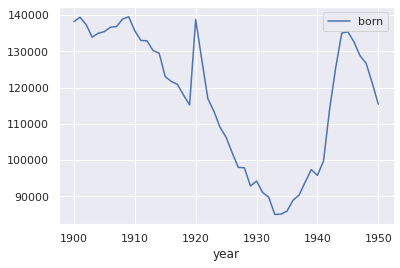

In [12]:
born_df.loc['1900':'1950'].plot()

In [13]:
dead_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101G/BefUtvKon1749'
dead_query = {
  "query": [
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1+2"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "0000001F"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [14]:
r_dead = requests.post(dead_url,json=dead_query)
r_dead

<Response [200]>

In [15]:
json_data_dead = r_dead.json()['data']
json_data_dead

[{'key': ['1+2', '1749'], 'values': ['49516']},
 {'key': ['1+2', '1750'], 'values': ['47622']},
 {'key': ['1+2', '1751'], 'values': ['46902']},
 {'key': ['1+2', '1752'], 'values': ['49467']},
 {'key': ['1+2', '1753'], 'values': ['43905']},
 {'key': ['1+2', '1754'], 'values': ['48645']},
 {'key': ['1+2', '1755'], 'values': ['51090']},
 {'key': ['1+2', '1756'], 'values': ['52062']},
 {'key': ['1+2', '1757'], 'values': ['56579']},
 {'key': ['1+2', '1758'], 'values': ['61277']},
 {'key': ['1+2', '1759'], 'values': ['49912']},
 {'key': ['1+2', '1760'], 'values': ['47471']},
 {'key': ['1+2', '1761'], 'values': ['49893']},
 {'key': ['1+2', '1762'], 'values': ['60744']},
 {'key': ['1+2', '1763'], 'values': ['64180']},
 {'key': ['1+2', '1764'], 'values': ['53364']},
 {'key': ['1+2', '1765'], 'values': ['54566']},
 {'key': ['1+2', '1766'], 'values': ['49726']},
 {'key': ['1+2', '1767'], 'values': ['51272']},
 {'key': ['1+2', '1768'], 'values': ['54751']},
 {'key': ['1+2', '1769'], 'values': ['54

In [16]:
dead_df = pd.DataFrame.from_dict(json_data_dead)
dead_df

,key,values
0,"[1+2, 1749]",[49516]
1,"[1+2, 1750]",[47622]
2,"[1+2, 1751]",[46902]
3,"[1+2, 1752]",[49467]
4,"[1+2, 1753]",[43905]
...,...,...
267,"[1+2, 2016]",[90982]
268,"[1+2, 2017]",[91972]
269,"[1+2, 2018]",[92185]
270,"[1+2, 2019]",[88766]


In [17]:
dead_df[['tmp','year']] = dead_df['key'].to_list()
dead_df

,key,values,tmp,year
0,"[1+2, 1749]",[49516],1+2,1749
1,"[1+2, 1750]",[47622],1+2,1750
2,"[1+2, 1751]",[46902],1+2,1751
3,"[1+2, 1752]",[49467],1+2,1752
4,"[1+2, 1753]",[43905],1+2,1753
...,...,...,...,...
267,"[1+2, 2016]",[90982],1+2,2016
268,"[1+2, 2017]",[91972],1+2,2017
269,"[1+2, 2018]",[92185],1+2,2018
270,"[1+2, 2019]",[88766],1+2,2019


In [18]:
dead_df['dead'] = dead_df['values'].apply(lambda x: x[0]).astype(int)
dead_df.drop(['key','values','tmp'],axis=1,inplace=True)
dead_df

,year,dead
0,1749,49516
1,1750,47622
2,1751,46902
3,1752,49467
4,1753,43905
...,...,...
267,2016,90982
268,2017,91972
269,2018,92185
270,2019,88766


In [19]:
dead_df.set_index('year',inplace=True)
dead_df

,dead
year,
1749,49516
1750,47622
1751,46902
1752,49467
1753,43905
...,...
2016,90982
2017,91972
2018,92185


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


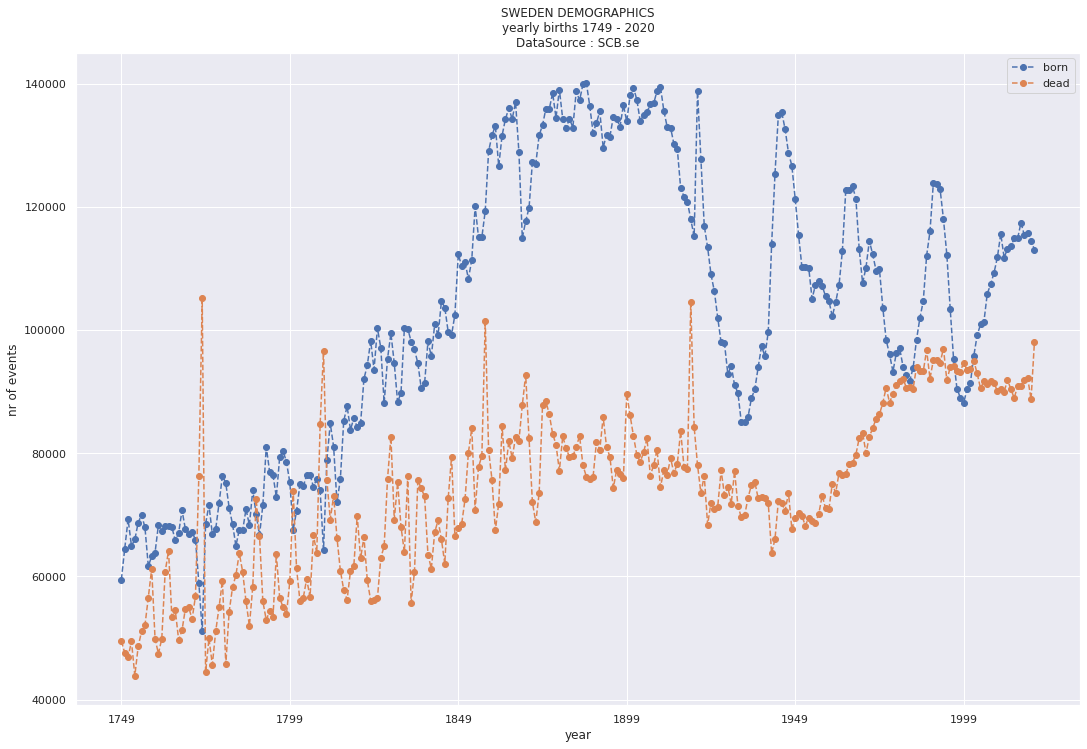

In [20]:
title = 'SWEDEN DEMOGRAPHICS\nyearly births 1749 - 2020\nDataSource : SCB.se'
ax = born_df.plot(figsize=(18,12),style='o--',title=title)
dead_df.plot(ax=ax,style='o--')
plt.ylabel('nr of events')
plt.savefig('scb_sweden_historical_births.jpg',format='jpg')

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


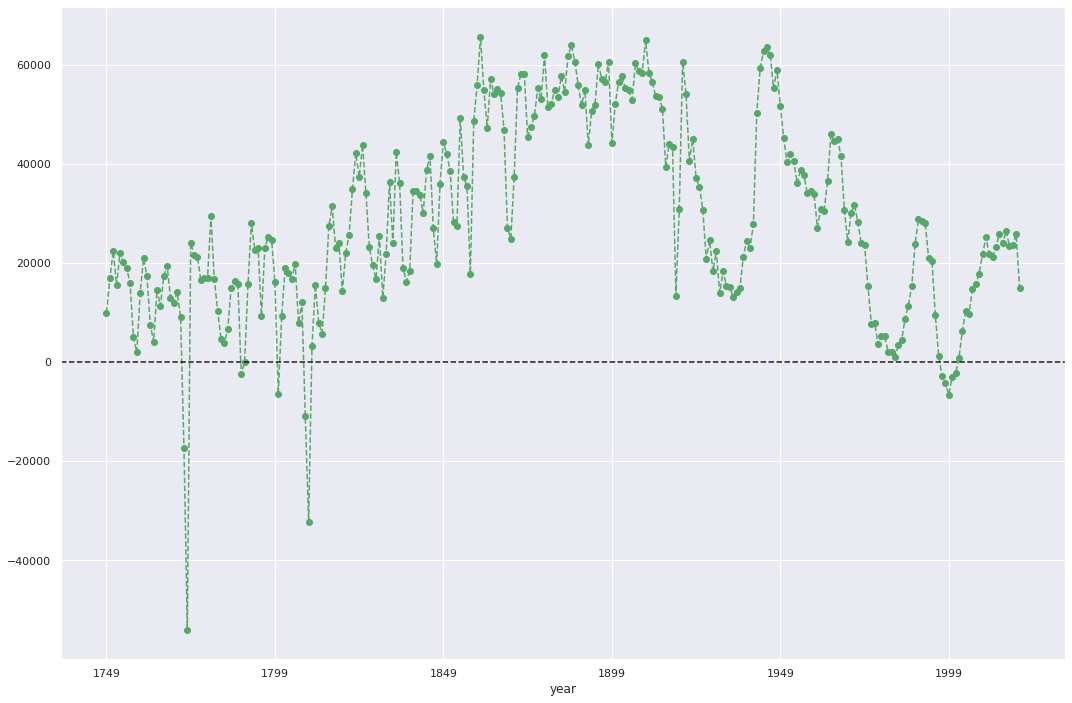

In [21]:
excess_births = born_df['born'] - dead_df['dead']
ax = excess_births.plot(figsize=(18,12),color=['g'],ls='dashed',marker='o')
ax.axhline(0,ls='dashed',color='k')

In [22]:
born_df.loc['1900':].sort_values('born').head(40)

,born
year,
1933,85020
1934,85092
1935,85906
1999,88173
1936,88938
1998,89028
1932,89779
1937,90373
2000,90441


In [23]:
### population ###

pop_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101A/BefolkningR1860N'
pop_query = {
  "query": [
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:ÅlderTotA",
        "values": []
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [24]:
r = requests.post(pop_url,json=pop_query)
r

<Response [200]>

In [25]:
json_data = r.json()['data']
json_data[0]

{'key': ['1', '1860'], 'values': ['1874399']}

In [26]:
pop_df = pd.DataFrame.from_dict(json_data)
pop_df[['gender','year']] = pop_df['key'].to_list()
pop_df['pop'] = pop_df['values'].apply(lambda x : x[0]).astype(int)
pop_df.drop(['key','values'],axis=1,inplace=True)
pop_df

,gender,year,pop
0,1,1860,1874399
1,1,1861,1903853
2,1,1862,1929522
3,1,1863,1958314
4,1,1864,1981471
...,...,...,...
317,2,2016,4981806
318,2,2017,5037580
319,2,2018,5087747
320,2,2019,5131775


In [27]:
pop_df = pop_df.groupby('year').sum()
pop_df

,pop
year,
1860,3859728
1861,3917339
1862,3965899
1863,4022564
1864,4070061
...,...
2016,9995153
2017,10120242
2018,10230185


In [28]:
pop_df.shift()

,pop
year,
1860,NaN
1861,3859728.0
1862,3917339.0
1863,3965899.0
1864,4022564.0
...,...
2016,9851017.0
2017,9995153.0
2018,10120242.0


In [29]:

births_per_pop = (born_df['born'] / pop_df['pop'].shift()).dropna()
births_per_pop

year
1861    0.032809
1862    0.033590
1863    0.033858
1864    0.033810
1865    0.032992
          ...   
2016    0.011920
2017    0.011547
2018    0.011446
2019    0.011195
2020    0.010949
Length: 160, dtype: float64

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


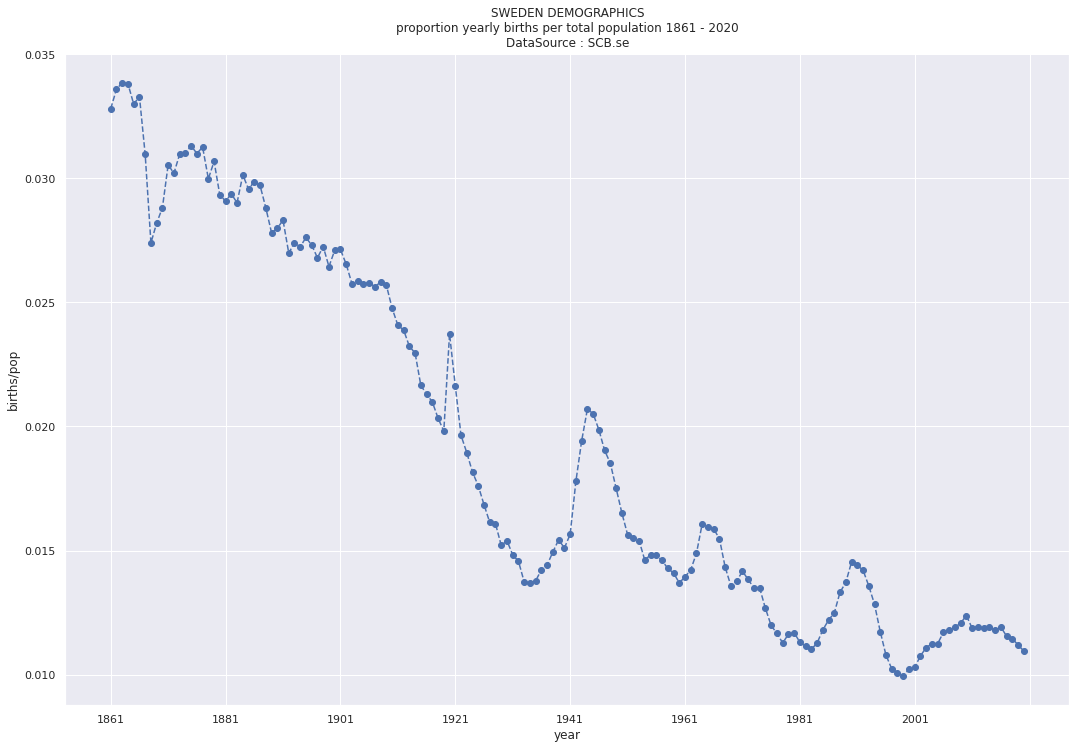

In [30]:
title = 'SWEDEN DEMOGRAPHICS\nproportion yearly births per total population 1861 - 2020\nDataSource : SCB.se'

births_per_pop.plot(figsize=(18,12),style='o--',title=title)
plt.ylabel("births/pop")
plt.savefig('scb_sweden_historical_births_prop.jpg',format='jpg')

In [31]:
births_per_pop.sort_values().head(40)

year
1999    0.009958
1998    0.010062
2000    0.010206
1997    0.010233
2001    0.010297
2002    0.010755
1996    0.010783
2020    0.010949
1983    0.011021
2003    0.011090
1982    0.011144
2019    0.011195
2004    0.011245
2005    0.011246
1984    0.011270
1978    0.011279
1981    0.011309
2018    0.011446
2017    0.011547
1979    0.011619
1977    0.011663
1980    0.011690
2006    0.011706
1995    0.011731
2015    0.011785
2007    0.011787
1985    0.011802
2011    0.011871
2013    0.011887
2008    0.011903
2014    0.011914
2016    0.011920
2012    0.011935
1976    0.011981
2009    0.012078
1986    0.012198
2010    0.012380
1987    0.012492
1975    0.012674
1994    0.012837
dtype: float64

In [32]:
pop_increase_by_births = (excess_births / pop_df['pop'].shift()).dropna()
pop_increase_by_births

year
1861    0.014199
1862    0.012058
1863    0.014386
1864    0.013441
1865    0.013529
          ...   
2016    0.002684
2017    0.002346
2018    0.002337
2019    0.002518
2020    0.001448
Length: 160, dtype: float64

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


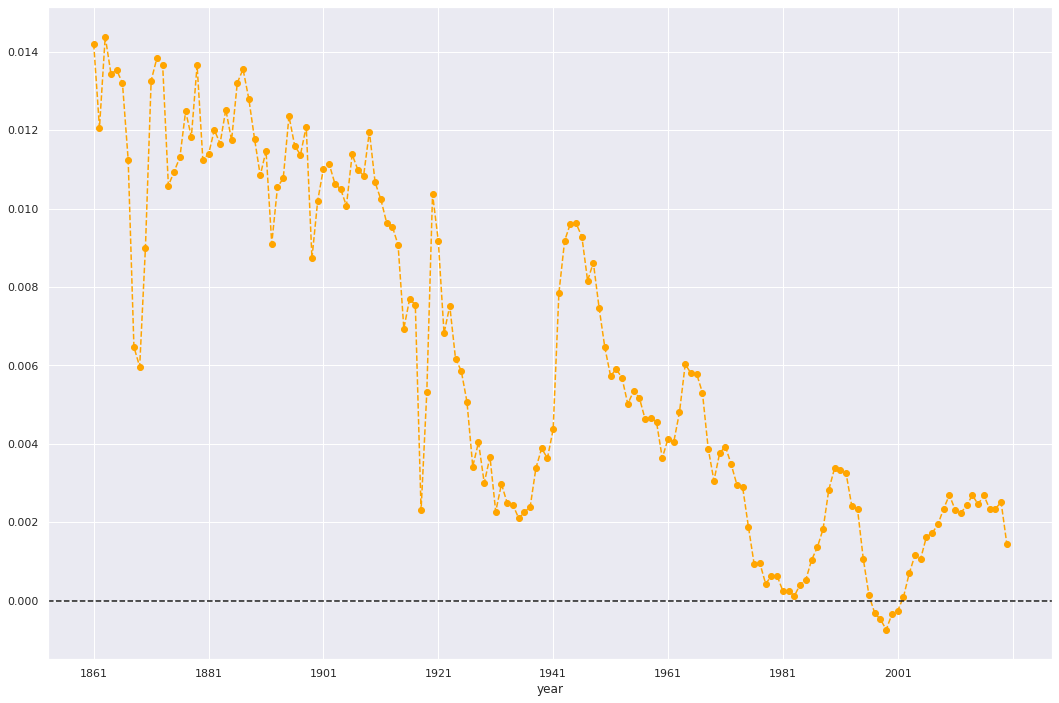

In [33]:
ax = pop_increase_by_births.plot(figsize=(18,12),ls='dashed',marker='o',color='orange')
ax.axhline(0,color='k',ls='dashed')